# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)

In [2]:

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=300
dtstep=12./nt
tar=arange(0.,12.,dtstep)

freqar = (2.*pi)/sar
def func(t):
    return func2(t)

"""
Update function to y=sin(t**2) for "chirp signal."
"""
def func2(t):
    y=0.
    if(t>0 and t<15):
        y=sin(t**2)
    return y

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext]) #y(t) for all t_i
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs, idextau] = 1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr*dtstep)
            
wavelet()

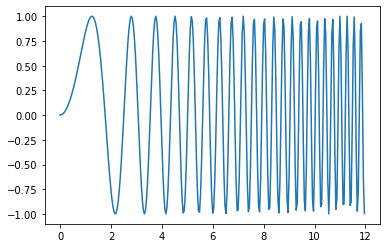

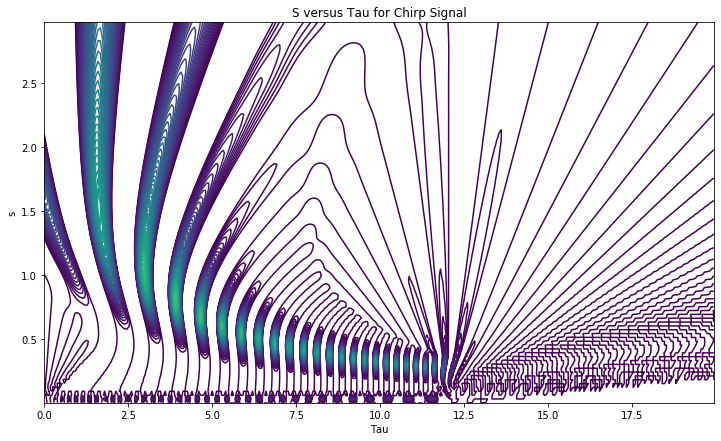

In [3]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)


fig = p.figure(figsize=(12,7))  
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(tauar,sar,ystau.imag, levels=levels)
p.xlabel('Tau')
p.ylabel('s')
plt.title("S versus Tau for Chirp Signal")
p.show()

Below, I include the LIGO chirp signal that I have obtained online, for comparison.

<img src="ligo-signal.jpg"> 

In Ligo's chirp signal found from gravitational waves, there is no signal obtained for the majority of the time scale. Then, there is an intense "curve" of frequencies found between 0.9 and 1.0 s. Our "chirp signal" obtained from the function
$y=sin(t^2)$ is essentially a mirror image of LIGO's chirp signal: this function produces a an intense "curve of frequencies at the beginning of the time interval, which gradually decreases in intensity with time.